In [137]:
import numpy as np
import pandas as pd

In [138]:
##Importação dos dados de treino

In [139]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [140]:
##Remoção de colunas inteiramente preenchidas por NaN

In [141]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [142]:
##Introdução do cabeçalho do data frame

In [143]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [144]:
##Geração de Histogramas e seleção de variáveis

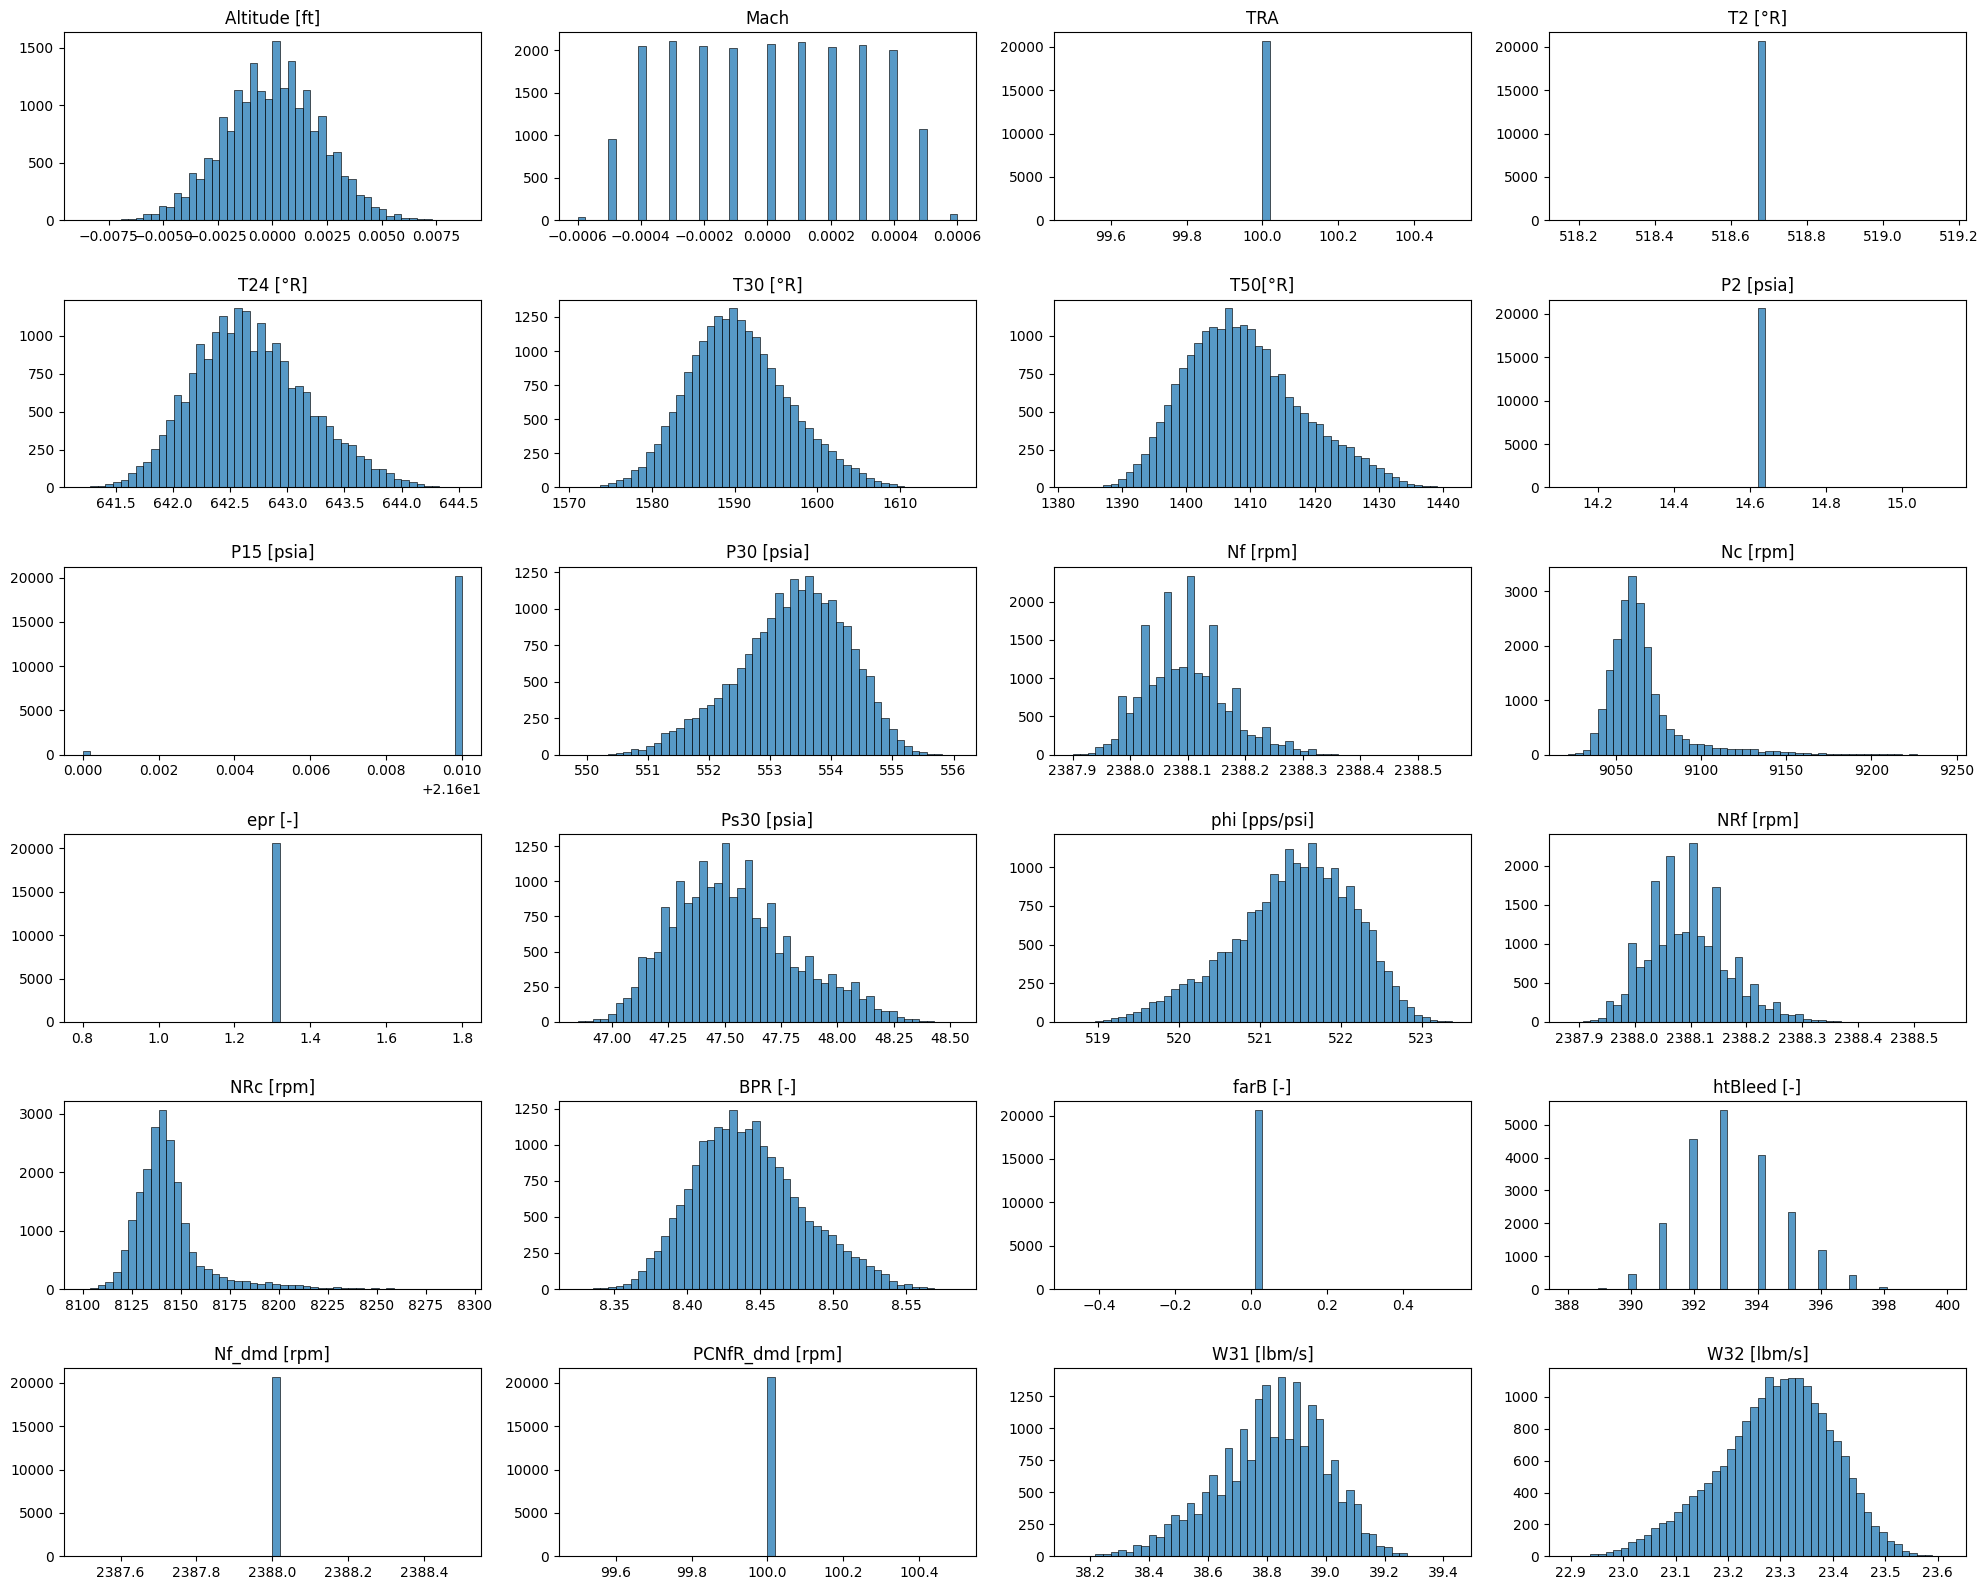

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [146]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [147]:
##Normalização

In [148]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [150]:
##Definição dos targets para regressão e classificação nos dados de treino

In [151]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [152]:
##Visualização de um ciclo de vida de um motor

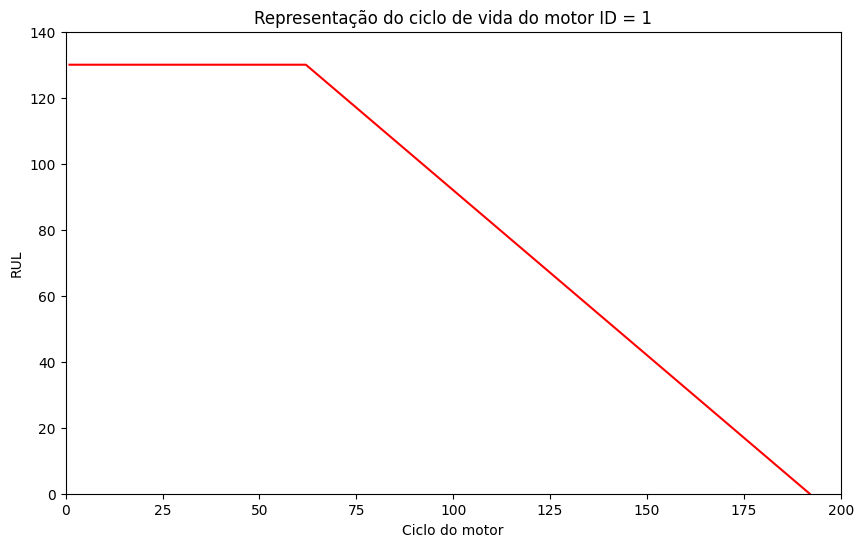

In [153]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [154]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [155]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [156]:
##Criação das janelas de tempo para dados de treino e de teste

In [157]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [158]:
##Separação das variáveis de treino e teste

In [159]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [160]:
##Criação do modelo LSTM

In [161]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape = (x1.shape[1], x1.shape[2])

model_lstm=Sequential()
model_lstm.add(LSTM(64,activation='tanh',
                return_sequences=True,input_shape=shape))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(256,activation='tanh'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='linear'))

model_lstm.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [162]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - loss: 3504.0820 - mean_absolute_error: 49.1444 - mean_squared_error: 3504.0820

71/71 ━━━━━━━━━━━━━━━━━━━━ 26s 250ms/step - loss: 2159.3406 - mean_absolute_error: 38.7404 - mean_squared_error: 2159.3406 - val_loss: 891.5906 - val_mean_absolute_error: 25.1044 - val_mean_squared_error: 891.5906
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 932.2903 - mean_absolute_error: 24.7364 - mean_squared_error: 932.2903

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 258ms/step - loss: 896.9991 - mean_absolute_error: 24.0495 - mean_squared_error: 896.9991 - val_loss: 648.5967 - val_mean_absolute_error: 20.2704 - val_mean_squared_error: 648.5967
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 741.3817 - mean_absolute_error: 21.4658 - mean_squared_error: 741.3817

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 237ms/step - loss: 695.2669 - mean_absolute_error: 20.6902 - mean_squared_error: 695.2669 - val_loss: 512.2028 - val_mean_absolute_error: 17.2848 - val_mean_squared_error: 512.2028
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - loss: 583.4434 - mean_absolute_error: 18.9035 - mean_squared_error: 583.4434

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - loss: 556.2673 - mean_absolute_error: 18.4182 - mean_squared_error: 556.2673 - val_loss: 349.4733 - val_mean_absolute_error: 14.8621 - val_mean_squared_error: 349.4733
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 480.2954 - mean_absolute_error: 17.0034 - mean_squared_error: 480.2954

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 217ms/step - loss: 470.5014 - mean_absolute_error: 16.7468 - mean_squared_error: 470.5014 - val_loss: 650.2587 - val_mean_absolute_error: 19.7241 - val_mean_squared_error: 650.2587
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 446.8300 - mean_absolute_error: 16.2916 - mean_squared_error: 446.8300

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - loss: 423.2910 - mean_absolute_error: 15.8161 - mean_squared_error: 423.2910 - val_loss: 290.6393 - val_mean_absolute_error: 12.5133 - val_mean_squared_error: 290.6393
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 411.9037 - mean_absolute_error: 15.5970 - mean_squared_error: 411.9037

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 241ms/step - loss: 408.8148 - mean_absolute_error: 15.5423 - mean_squared_error: 408.8148 - val_loss: 247.2058 - val_mean_absolute_error: 11.9899 - val_mean_squared_error: 247.2058
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 368.6068 - mean_absolute_error: 14.6548 - mean_squared_error: 368.6068

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 252ms/step - loss: 375.8337 - mean_absolute_error: 14.7943 - mean_squared_error: 375.8337 - val_loss: 318.8043 - val_mean_absolute_error: 14.4367 - val_mean_squared_error: 318.8043
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 347.8672 - mean_absolute_error: 14.2067 - mean_squared_error: 347.8672

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - loss: 355.6774 - mean_absolute_error: 14.3346 - mean_squared_error: 355.6774 - val_loss: 283.1918 - val_mean_absolute_error: 12.5009 - val_mean_squared_error: 283.1918
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 370.9651 - mean_absolute_error: 14.6668 - mean_squared_error: 370.9651

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 230ms/step - loss: 351.3398 - mean_absolute_error: 14.2611 - mean_squared_error: 351.3398 - val_loss: 253.1112 - val_mean_absolute_error: 11.3771 - val_mean_squared_error: 253.1112
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 343.2424 - mean_absolute_error: 14.1192 - mean_squared_error: 343.2424

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 251ms/step - loss: 334.9000 - mean_absolute_error: 13.9059 - mean_squared_error: 334.9000 - val_loss: 270.8228 - val_mean_absolute_error: 12.6905 - val_mean_squared_error: 270.8228
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 333.2628 - mean_absolute_error: 13.7956 - mean_squared_error: 333.2628

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - loss: 333.1832 - mean_absolute_error: 13.8123 - mean_squared_error: 333.1832 - val_loss: 336.2623 - val_mean_absolute_error: 14.0769 - val_mean_squared_error: 336.2623


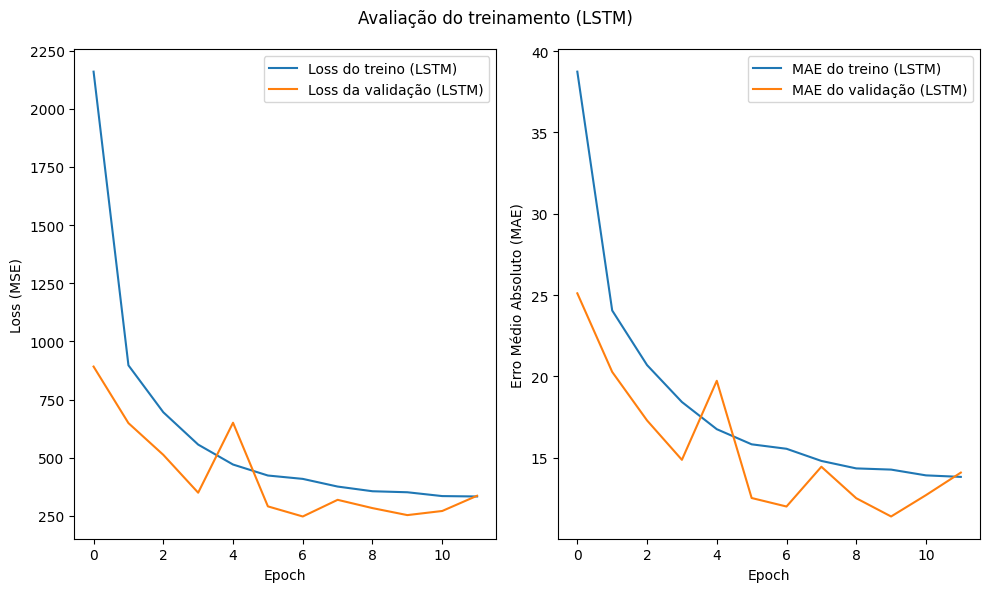

In [163]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint]) 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [164]:
##Testando o modelo com os dados de teste 

In [165]:
rul_prev = model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


In [166]:
##Avaliando o modelo

482.142354236648
21.96
0.16832963035448148
18.157286807199046
0.5131526003497084
Tempo de 228.132535s


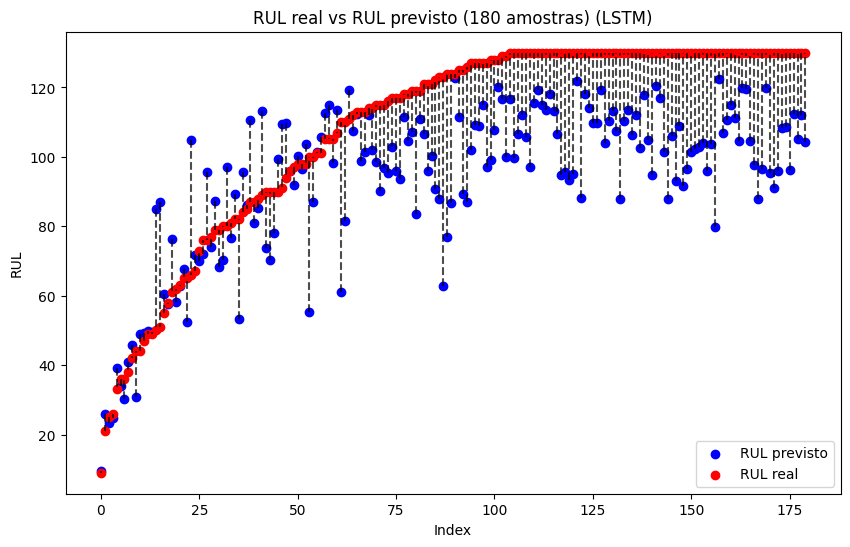

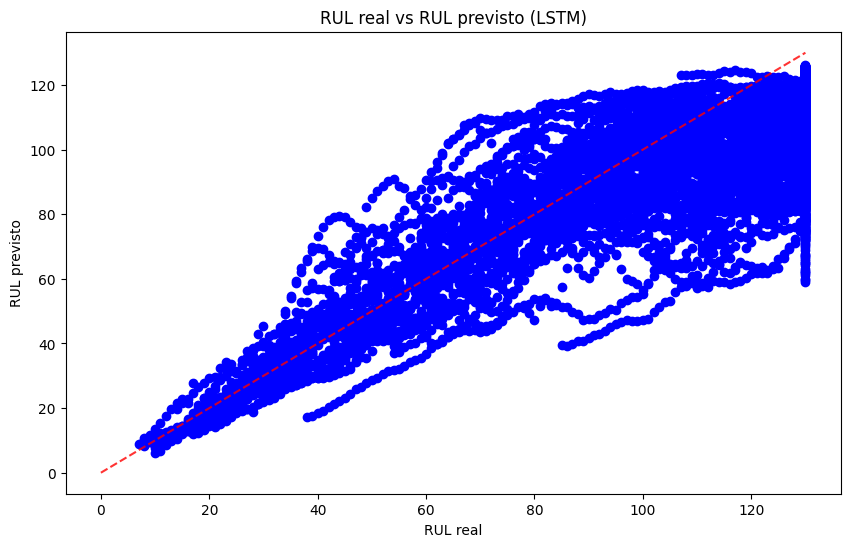

In [167]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [168]:
##Criando modelo BiLSTM

In [169]:
model_bi=Sequential()
model_bi.add(Bidirectional(LSTM(64,activation='tanh',input_shape=shape)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(64,activation='relu'))
model_bi.add(Dense(1,activation='linear'))

model_bi.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [170]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5797.2124 - mean_absolute_error: 64.4562 - mean_squared_error: 5797.2124

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 3934.6489 - mean_absolute_error: 52.5668 - mean_squared_error: 3934.6492 - val_loss: 1868.5299 - val_mean_absolute_error: 38.6290 - val_mean_squared_error: 1868.5299
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1467.0389 - mean_absolute_error: 33.2468 - mean_squared_error: 1467.0389

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 1119.2710 - mean_absolute_error: 28.4437 - mean_squared_error: 1119.2710 - val_loss: 806.1632 - val_mean_absolute_error: 23.2950 - val_mean_squared_error: 806.1632
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 699.5887 - mean_absolute_error: 21.5425 - mean_squared_error: 699.5887

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 663.2685 - mean_absolute_error: 20.8301 - mean_squared_error: 663.2685 - val_loss: 500.6289 - val_mean_absolute_error: 18.1538 - val_mean_squared_error: 500.6289
Epoch 4/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 611.0857 - mean_absolute_error: 19.6639 - mean_squared_error: 611.0857

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 603.3628 - mean_absolute_error: 19.5465 - mean_squared_error: 603.3628 - val_loss: 416.0750 - val_mean_absolute_error: 16.5163 - val_mean_squared_error: 416.0750
Epoch 5/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 551.5104 - mean_absolute_error: 18.4926 - mean_squared_error: 551.5104

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 556.0833 - mean_absolute_error: 18.5473 - mean_squared_error: 556.0833 - val_loss: 424.6967 - val_mean_absolute_error: 16.3284 - val_mean_squared_error: 424.6967
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 517.9916 - mean_absolute_error: 18.0150 - mean_squared_error: 517.9916

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 522.8004 - mean_absolute_error: 18.0215 - mean_squared_error: 522.8004 - val_loss: 371.7013 - val_mean_absolute_error: 14.9619 - val_mean_squared_error: 371.7013
Epoch 7/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 494.8477 - mean_absolute_error: 17.4018 - mean_squared_error: 494.8477

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 501.1844 - mean_absolute_error: 17.4871 - mean_squared_error: 501.1844 - val_loss: 374.1617 - val_mean_absolute_error: 14.7275 - val_mean_squared_error: 374.1617
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 494.8417 - mean_absolute_error: 17.3620 - mean_squared_error: 494.8417

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 495.3152 - mean_absolute_error: 17.3289 - mean_squared_error: 495.3152 - val_loss: 414.2983 - val_mean_absolute_error: 15.9719 - val_mean_squared_error: 414.2983
Epoch 9/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 482.3026 - mean_absolute_error: 17.1474 - mean_squared_error: 482.3026

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 477.4243 - mean_absolute_error: 16.9635 - mean_squared_error: 477.4243 - val_loss: 392.9847 - val_mean_absolute_error: 16.1105 - val_mean_squared_error: 392.9847
Epoch 10/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 456.6779 - mean_absolute_error: 16.6051 - mean_squared_error: 456.6779

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 463.3975 - mean_absolute_error: 16.7038 - mean_squared_error: 463.3975 - val_loss: 331.7698 - val_mean_absolute_error: 14.0442 - val_mean_squared_error: 331.7698
Epoch 11/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 444.8236 - mean_absolute_error: 16.5204 - mean_squared_error: 444.8236

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 446.0930 - mean_absolute_error: 16.4845 - mean_squared_error: 446.0930 - val_loss: 306.9164 - val_mean_absolute_error: 13.6118 - val_mean_squared_error: 306.9164
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 442.6524 - mean_absolute_error: 16.3116 - mean_squared_error: 442.6524

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 439.5169 - mean_absolute_error: 16.2746 - mean_squared_error: 439.5169 - val_loss: 302.6295 - val_mean_absolute_error: 13.6275 - val_mean_squared_error: 302.6295
Epoch 13/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 415.5169 - mean_absolute_error: 15.8144 - mean_squared_error: 415.5169

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 422.2386 - mean_absolute_error: 15.9065 - mean_squared_error: 422.2386 - val_loss: 293.7865 - val_mean_absolute_error: 13.7479 - val_mean_squared_error: 293.7865
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 408.7683 - mean_absolute_error: 15.7197 - mean_squared_error: 408.7683

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 405.5373 - mean_absolute_error: 15.6455 - mean_squared_error: 405.5373 - val_loss: 294.8222 - val_mean_absolute_error: 13.3808 - val_mean_squared_error: 294.8222
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 409.7540 - mean_absolute_error: 15.6539 - mean_squared_error: 409.7540

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 405.1255 - mean_absolute_error: 15.5335 - mean_squared_error: 405.1255 - val_loss: 359.1934 - val_mean_absolute_error: 15.0285 - val_mean_squared_error: 359.1934
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 404.5329 - mean_absolute_error: 15.5802 - mean_squared_error: 404.5329

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 392.9218 - mean_absolute_error: 15.2944 - mean_squared_error: 392.9218 - val_loss: 371.5968 - val_mean_absolute_error: 14.8331 - val_mean_squared_error: 371.5968
Epoch 17/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 381.9623 - mean_absolute_error: 15.1050 - mean_squared_error: 381.9623

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 393.7733 - mean_absolute_error: 15.2753 - mean_squared_error: 393.7733 - val_loss: 295.6013 - val_mean_absolute_error: 13.0274 - val_mean_squared_error: 295.6013
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 376.5024 - mean_absolute_error: 14.9796 - mean_squared_error: 376.5024

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 379.9474 - mean_absolute_error: 15.0305 - mean_squared_error: 379.9473 - val_loss: 252.1221 - val_mean_absolute_error: 12.4644 - val_mean_squared_error: 252.1221
Epoch 19/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 373.2692 - mean_absolute_error: 14.6947 - mean_squared_error: 373.2692

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 373.8030 - mean_absolute_error: 14.7562 - mean_squared_error: 373.8030 - val_loss: 404.6484 - val_mean_absolute_error: 14.6874 - val_mean_squared_error: 404.6484
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 375.5997 - mean_absolute_error: 14.8801 - mean_squared_error: 375.5997

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 367.7584 - mean_absolute_error: 14.7149 - mean_squared_error: 367.7584 - val_loss: 246.4562 - val_mean_absolute_error: 11.9977 - val_mean_squared_error: 246.4562
Epoch 21/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 351.1026 - mean_absolute_error: 14.3651 - mean_squared_error: 351.1026

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 358.5047 - mean_absolute_error: 14.4829 - mean_squared_error: 358.5047 - val_loss: 265.4612 - val_mean_absolute_error: 12.2763 - val_mean_squared_error: 265.4612
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 364.6429 - mean_absolute_error: 14.6493 - mean_squared_error: 364.6429

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 354.3738 - mean_absolute_error: 14.3340 - mean_squared_error: 354.3738 - val_loss: 268.8164 - val_mean_absolute_error: 12.2240 - val_mean_squared_error: 268.8164
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 356.1575 - mean_absolute_error: 14.3057 - mean_squared_error: 356.1575

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 347.5830 - mean_absolute_error: 14.1387 - mean_squared_error: 347.5830 - val_loss: 281.1517 - val_mean_absolute_error: 12.3713 - val_mean_squared_error: 281.1517
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 331.8070 - mean_absolute_error: 13.8894 - mean_squared_error: 331.8070

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 339.5598 - mean_absolute_error: 14.0401 - mean_squared_error: 339.5598 - val_loss: 236.8647 - val_mean_absolute_error: 11.4974 - val_mean_squared_error: 236.8647
Epoch 25/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 330.9724 - mean_absolute_error: 13.9167 - mean_squared_error: 330.9724

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 332.8716 - mean_absolute_error: 13.8913 - mean_squared_error: 332.8715 - val_loss: 331.5331 - val_mean_absolute_error: 13.6878 - val_mean_squared_error: 331.5331
Epoch 26/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 331.6467 - mean_absolute_error: 13.8034 - mean_squared_error: 331.6467

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 325.8627 - mean_absolute_error: 13.7202 - mean_squared_error: 325.8627 - val_loss: 279.0867 - val_mean_absolute_error: 11.9685 - val_mean_squared_error: 279.0867
Epoch 27/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 337.0412 - mean_absolute_error: 13.8903 - mean_squared_error: 337.0412

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 325.9043 - mean_absolute_error: 13.6390 - mean_squared_error: 325.9043 - val_loss: 274.6594 - val_mean_absolute_error: 12.6787 - val_mean_squared_error: 274.6594
Epoch 28/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 340.8329 - mean_absolute_error: 13.8856 - mean_squared_error: 340.8329

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 334.1677 - mean_absolute_error: 13.8145 - mean_squared_error: 334.1677 - val_loss: 210.3877 - val_mean_absolute_error: 10.7676 - val_mean_squared_error: 210.3877
Epoch 29/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 320.1455 - mean_absolute_error: 13.5683 - mean_squared_error: 320.1455

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 320.4589 - mean_absolute_error: 13.5657 - mean_squared_error: 320.4589 - val_loss: 256.5257 - val_mean_absolute_error: 11.9275 - val_mean_squared_error: 256.5257
Epoch 30/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 313.3008 - mean_absolute_error: 13.4380 - mean_squared_error: 313.3008

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 315.6049 - mean_absolute_error: 13.4355 - mean_squared_error: 315.6049 - val_loss: 220.7305 - val_mean_absolute_error: 11.0771 - val_mean_squared_error: 220.7305


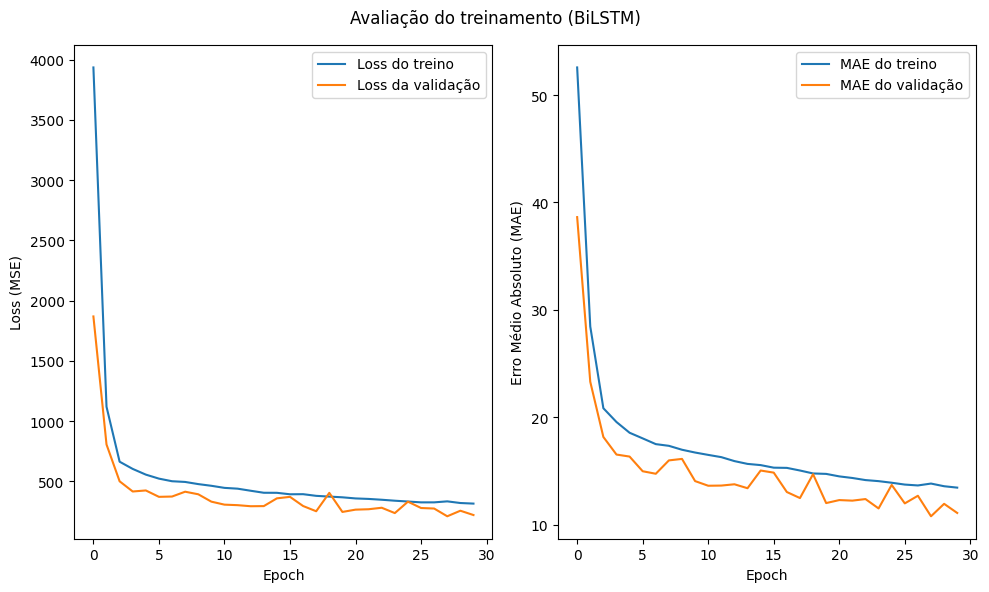

In [171]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [172]:
##Testando o modelo com os dados de teste

In [173]:
rul_prev = model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


In [174]:
##Avaliando o modelo

245.19875734492533
15.66
0.13488446463623627
12.214867354047303
0.7524084404493788
Tempo de 115.929246s


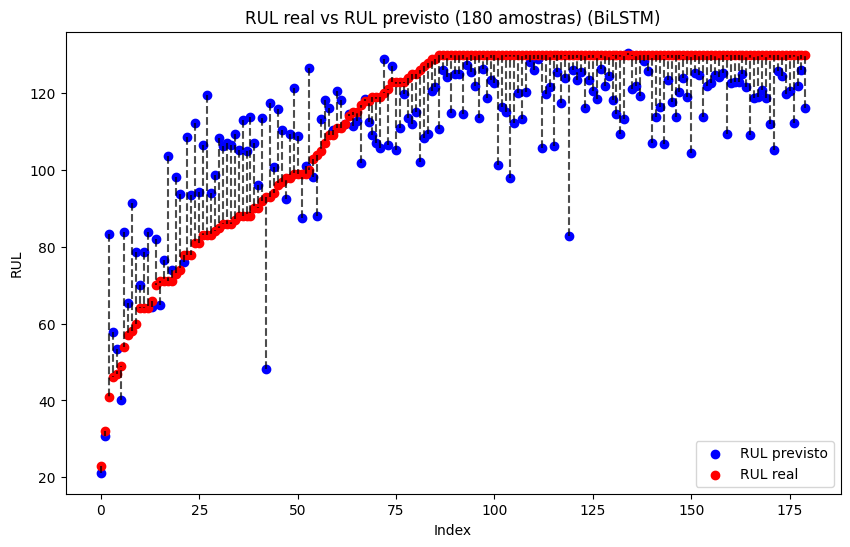

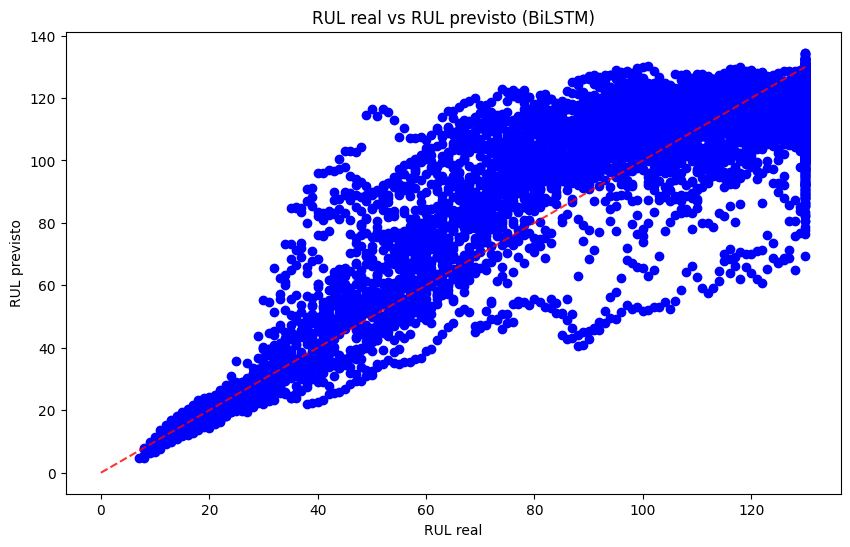

In [175]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()